# 정확도

## Titanic 예제를 통한 정확도의 문제점 (이진분류)

In [52]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass #학습X
    
    def predict(selft, X):
        import numpy as np
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv(r'C:\Users\Hyunjung\OneDrive - 이화여자대학교\바탕 화면\현정\PAPER\4.데이터분석\ESAA_캐글필사\타이타닉EDA\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                   test_size=0.2, random_state=0)

In [55]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


## MNIST 데이터를 통한 정확도의 문제점 (불균형한 label)

In [56]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X): # 모두 0으로 예측
        return np.zeros((len(X),1), dtype=bool)

In [57]:
digits = load_digits()

y = (digits.target==7).astype(int) # 번호가 7이면 1로, 아니면 0으로 변환
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11) #default test_size=0.2

In [58]:
print(y_test.shape)
print(pd.Series(y_test).value_counts())

(450,)
0    405
1     45
dtype: int64


In [59]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)

fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

모든 예측을 0으로 하여도 정확도는:0.900


# 오차 행렬

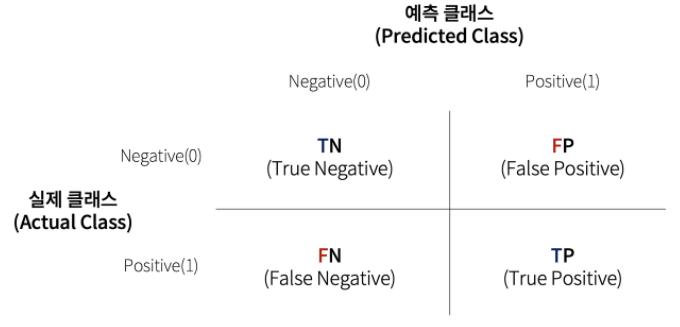

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [61]:
print(accuracy_score(y_test, fakepred))
print(precision_score(y_test, fakepred))
print(recall_score(y_test, fakepred))

0.9
0.0
0.0


C:\Users\Hyunjung\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


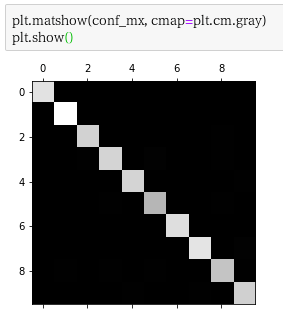

# 정밀도와 재현율

## Titanic 예제로 정밀도, 재현율 계산

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [63]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv(r'C:\Users\Hyunjung\OneDrive - 이화여자대학교\바탕 화면\현정\PAPER\4.데이터분석\ESAA_캐글필사\타이타닉EDA\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                   test_size=0.2, random_state=11)

In [64]:
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\Hyunjung\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 정밀도, 재현율 트레이드오프

In [65]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {}'.format(pred_proba.shape))
print(pred_proba[:3])
print()

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1) #예측 결과 열 붙이기
print(pred_proba_result[:3]) ## predict의 임곗값 0.5

pred_proba()결과 Shape : (179, 2)
[[0.46195975 0.53804025]
 [0.87863574 0.12136426]
 [0.87716579 0.12283421]]

[[0.46195975 0.53804025 1.        ]
 [0.87863574 0.12136426 0.        ]
 [0.87716579 0.12283421 0.        ]]


predict() 메서드는 predict_proba() 메서드에 기반해서 만들어짐

In [66]:
### Binarizer 클래스 이해하기

from sklearn.preprocessing import Binarizer

X = [[1,-1,2], 
    [2,0,0], 
    [0,1.1,1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [67]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [68]:
from sklearn.preprocessing import Binarizer

custom_threshold = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for i in thresholds:
        binarizer = Binarizer(threshold=i).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',i)
        get_clf_eval(y_test, custom_predict)
        print()

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), custom_threshold)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377



In [69]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

In [70]:
thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index) # 임곗값 index
np.round(trhesholds[thr_index],2)

[  0  15  30  45  60  75  90 105 120 135]


array([0.1 , 0.12, 0.14, 0.19, 0.28, 0.4 , 0.56, 0.67, 0.82, 0.95])

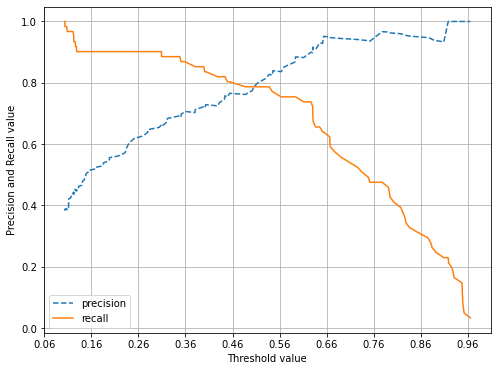

In [71]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

# F1 스코어

In [80]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {:.4f}'.format(f1))

F1 스코어: 0.7805


# ROC 곡선과 AUC